# Лабораторная работа 3. Линейная регрессия. Часть 2

### Задание 1. Полиномиальная регрессия

Загрузите данные из файлов ``ml_lab2_train.txt`` и ``ml_lab2_test.txt`` (вторая лабораторная работа).

Для $k = 1,2,3,\ldots,10$ найдите полином ${f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость.

Выведите коэффициенты полиномов и нарисуйте их графики на одном чертеже вместе с точками данных $(x_i, y_i)$ (возможно, чертеж стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Для каждого из полиномов найдите среднеквадратическую ошибку $MSE$ и коэффициент детерминации $R^2$ на обучающих данных и на тестовых данных. Постройте графики зависимости $MSE$ на обучающих и тестовых данных в зависимости от степени полинома.

Сделайте вывод, что происходит с ошибкой на обучающих и тестовых данных с увеличением степени полинома.

In [1]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = np.loadtxt('../ml_lab2/ml_lab2_train.txt', delimiter=',')
data_test = np.loadtxt('../ml_lab2/ml_lab2_test.txt', delimiter=',')

In [3]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

In [4]:
reg = [ np.polyfit(X_train, y_train, k) for k in range(1, 11) ]
reg

[array([2.2791345 , 4.43323091]),
 array([1.40162851, 1.15783169, 4.4724765 ]),
 array([-0.3817686 ,  1.85975084,  1.06501611,  4.46073636]),
 array([  7.9184747 , -13.05132812,   6.79409178,   1.17180239,
          4.34116612]),
 array([ 29.52497804, -51.13148139,  21.37479628,   3.2747144 ,
         -0.13059804,   4.43129781]),
 array([-229.97013345,  581.45329832, -481.51013295,  121.25709715,
          16.00290399,   -4.59717933,    4.38379501]),
 array([-167.38196464,  238.69936753,  122.87821736, -314.2311726 ,
         119.35078428,    7.21545861,   -4.00889591,    4.44451271]),
 array([ 1.72947756e+03, -5.70171017e+03,  6.76062844e+03, -3.13285638e+03,
         1.09895667e+02,  2.68860439e+02, -2.66956310e+01, -5.18277352e+00,
         4.66378911e+00]),
 array([  903.21551629, -1522.09829398, -1216.44817832,  3913.26809306,
        -2441.96268939,   176.24541113,   219.04203752,   -24.26271676,
           -4.55270582,     4.6458836 ]),
 array([-9.81857952e+03,  4.01775336e+04, 

In [5]:
y_predict_train = [ np.polyval(reg[k], X_train) for k in range(0, len(reg)) ]

In [6]:
y_predict = [ np.polyval(reg[k], X_test) for k in range(0, len(reg)) ]

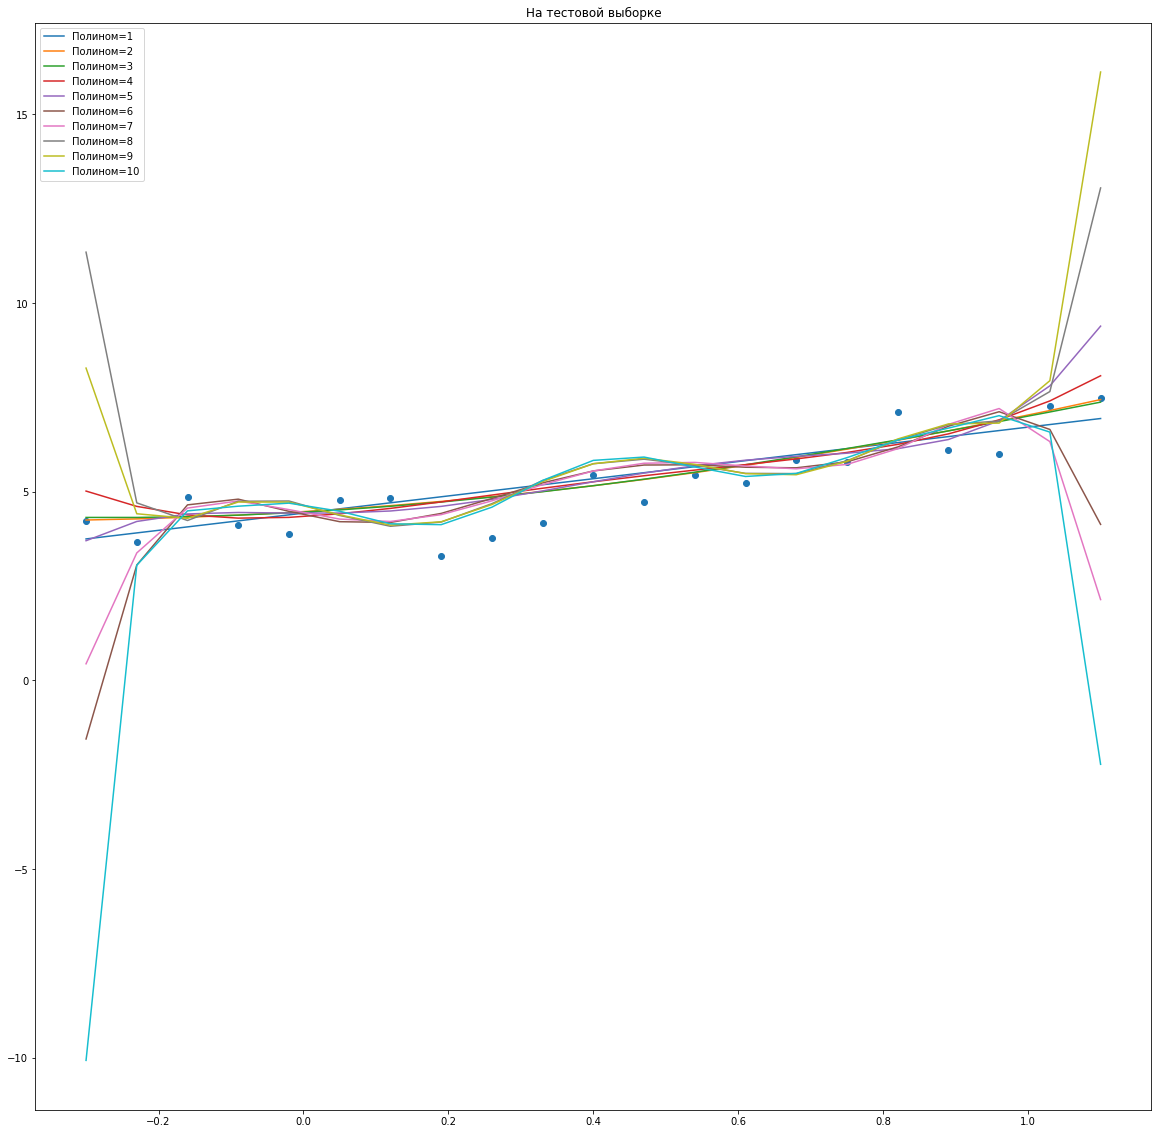

In [7]:
plt.figure(figsize=(20, 20))
plt.scatter(X_test, y_test)
for k in range(0, len(y_predict)):
    plt.plot(X_test, y_predict[k], label='Полином={}'.format(k+1))
plt.legend()
plt.title("На тестовой выборке")
plt.show()

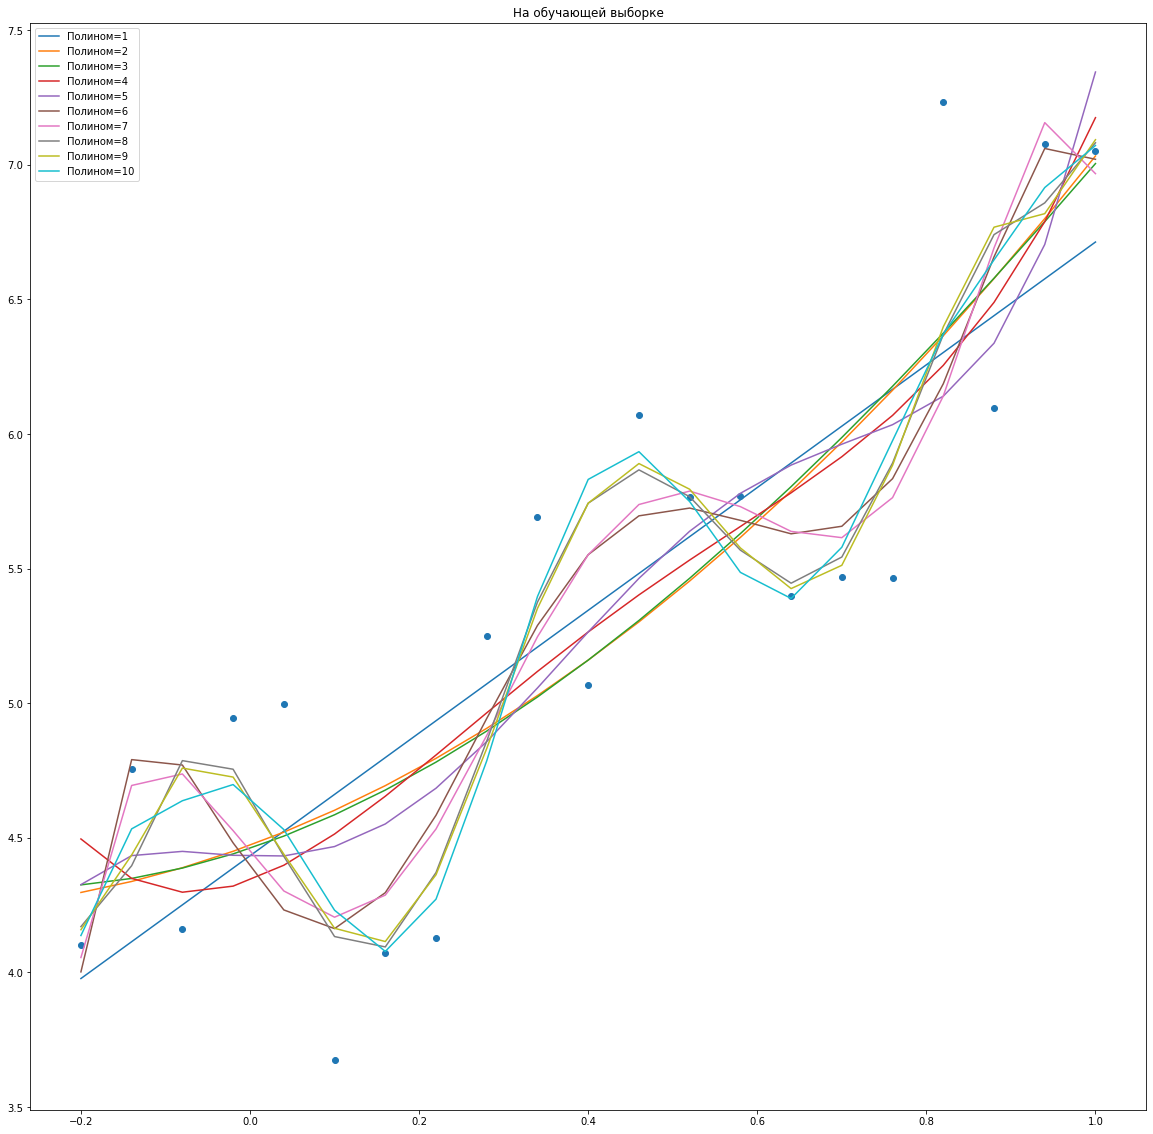

In [8]:
plt.figure(figsize=(20, 20))
plt.scatter(X_train, y_train)
for k in range(0, len(y_predict_train)):
    plt.plot(X_train, y_predict_train[k], label='Полином={}'.format(k+1))
plt.legend()
plt.title("На обучающей выборке")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
y_mse = [mean_squared_error(y_test, predict) for predict in y_predict ]

In [11]:
y_mse

[0.43512020040488847,
 0.3564762887831232,
 0.3553464571518422,
 0.44172701892837457,
 0.5579732021691463,
 2.581692933697921,
 2.5157829032610377,
 4.357288520728435,
 4.776342278518039,
 14.632427976877235]

In [12]:
y_mse_train = [ mean_squared_error(y_train, predict) for predict in y_predict_train ]

In [13]:
y_mse_train

[0.2968966332625196,
 0.2696989158766913,
 0.26949718714796095,
 0.26106653305792743,
 0.24998504648317554,
 0.18829348988370276,
 0.18539621153294328,
 0.15905556579089633,
 0.15847184274696674,
 0.15316610994159346]

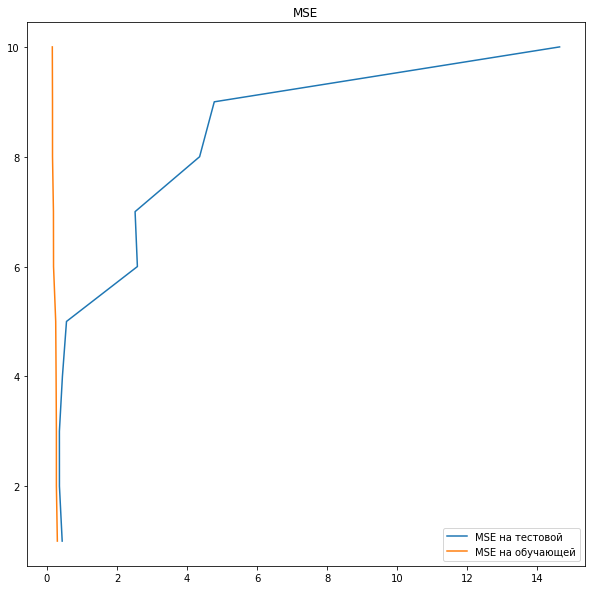

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(y_mse, range(1, 11), label='MSE на тестовой')
plt.plot(y_mse_train, range(1, 11), label='MSE на обучающей')
plt.legend()
plt.title("MSE")
plt.show()

In [15]:
y_r2 = [ r2_score(y_test, predict) for predict in y_predict ]
y_r2

[0.6848801332179666,
 0.7418351055001273,
 0.7426533446735881,
 0.6800953869087014,
 0.595908346769757,
 -0.8696965403628412,
 -0.8219636150894478,
 -2.155606604577676,
 -2.459090938805996,
 -9.596999979501414]

### Задание 2. Регуляризация

Вспомним, что задачу линейной регрессии (нахождение вектора коэффициентов $\overrightarrow{w}_{opt}$) можно решить при помощи нормального уравнения:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Если строки или столбцы матрицы $X$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не может быть решена с помощью нормального уравнения (придется использовать, например, градиентный спуск). На практике различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место *переобучение* (overfitting). Один из симптомов этой проблемы $-$ необычно большие по модулю компоненты вектора $\overrightarrow{w}_{opt}$.

Один из способов борьбы с переобучением $-$ **регуляризация**. Сейчас мы рассмотрим одну из её разновидностей $-$ **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \alpha I)$, где $\alpha$ $-$ параметр регуляризации, $I$ $-$ единичная матрица. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение:

$$\overrightarrow{w}_{opt} = (X^TX + \alpha I)^{-1}X^T\overrightarrow{y}$$

и снижаем эффект переобучения. Параметр $\alpha$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации полиномом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным параметром $\alpha$, ошибку на тестовой выборке можно сделать не больше, чем для полинома оптимальной степени в модели без регуляризации. Для этого $\alpha$ сравните $\det(X^TX)$ и $\det(X^TX + \alpha I)$.

In [16]:
def poly_fit(x, y, l2, polynom):
    matrix = np.zeros(shape = (len(x), polynom + 1))
    matrix[:, 0] = 1
    for i in range(1, polynom + 1):
        matrix[:, i] = np.power(x, i).reshape((len(x), ))
    
    print(f"Определитель матрицы без параметра регуляризации {np.linalg.det(matrix.T.dot(matrix))}")
    print(f"Определитель матрицы с параметром регуляризации {np.linalg.det(matrix.T.dot(matrix) + l2 * np.eye(polynom + 1))}")
    W = sla.inv((matrix.T.dot(matrix) + l2 * np.eye(polynom + 1))).dot(matrix.T).dot(y)
    return np.flip(W)



In [17]:
poly_fit(X_train, y_train, 0.1, 2)

Определитель матрицы без параметра регуляризации 16.92382108031998
Определитель матрицы с параметром регуляризации 27.57482788787196


array([1.27290485, 1.27875661, 4.44054838])

In [18]:
reg = [ poly_fit(X_train, y_train, 0, k) for k in range(1, 11) ]


Определитель матрицы без параметра регуляризации 58.212
Определитель матрицы с параметром регуляризации 58.212
Определитель матрицы без параметра регуляризации 16.92382108031998
Определитель матрицы с параметром регуляризации 16.92382108031998
Определитель матрицы без параметра регуляризации 0.49190932025768047
Определитель матрицы с параметром регуляризации 0.49190932025768047
Определитель матрицы без параметра регуляризации 0.0013889370084706357
Определитель матрицы с параметром регуляризации 0.0013889370084706357
Определитель матрицы без параметра регуляризации 3.707837587543474e-07
Определитель матрицы с параметром регуляризации 3.707837587543474e-07
Определитель матрицы без параметра регуляризации 9.082864838378161e-12
Определитель матрицы с параметром регуляризации 9.082864838378161e-12
Определитель матрицы без параметра регуляризации 1.972491069583749e-17
Определитель матрицы с параметром регуляризации 1.972491069583749e-17
Определитель матрицы без параметра регуляризации 3.6477

In [19]:
reg_l2 = [ poly_fit(X_train, y_train, 1, k) for k in range(1, 11) ]

Определитель матрицы без параметра регуляризации 58.212
Определитель матрицы с параметром регуляризации 86.34399999999997
Определитель матрицы без параметра регуляризации 16.92382108031998
Определитель матрицы с параметром регуляризации 152.31250537984002
Определитель матрицы без параметра регуляризации 0.49190932025768047
Определитель матрицы с параметром регуляризации 226.72921633577357
Определитель матрицы без параметра регуляризации 0.0013889370084706357
Определитель матрицы с параметром регуляризации 311.0200752829157
Определитель матрицы без параметра регуляризации 3.707837587543474e-07
Определитель матрицы с параметром регуляризации 405.10952368135486
Определитель матрицы без параметра регуляризации 9.082864838378161e-12
Определитель матрицы с параметром регуляризации 509.2164507942177
Определитель матрицы без параметра регуляризации 1.972491069583749e-17
Определитель матрицы с параметром регуляризации 623.5583211354879
Определитель матрицы без параметра регуляризации 3.64779885

In [20]:
y_predict = [ np.polyval(reg[k], X_test) for k in range(0, len(reg)) ]

In [21]:
y_predict_l2 = [ np.polyval(reg_l2[k], X_test) for k in range(0, len(reg_l2)) ]

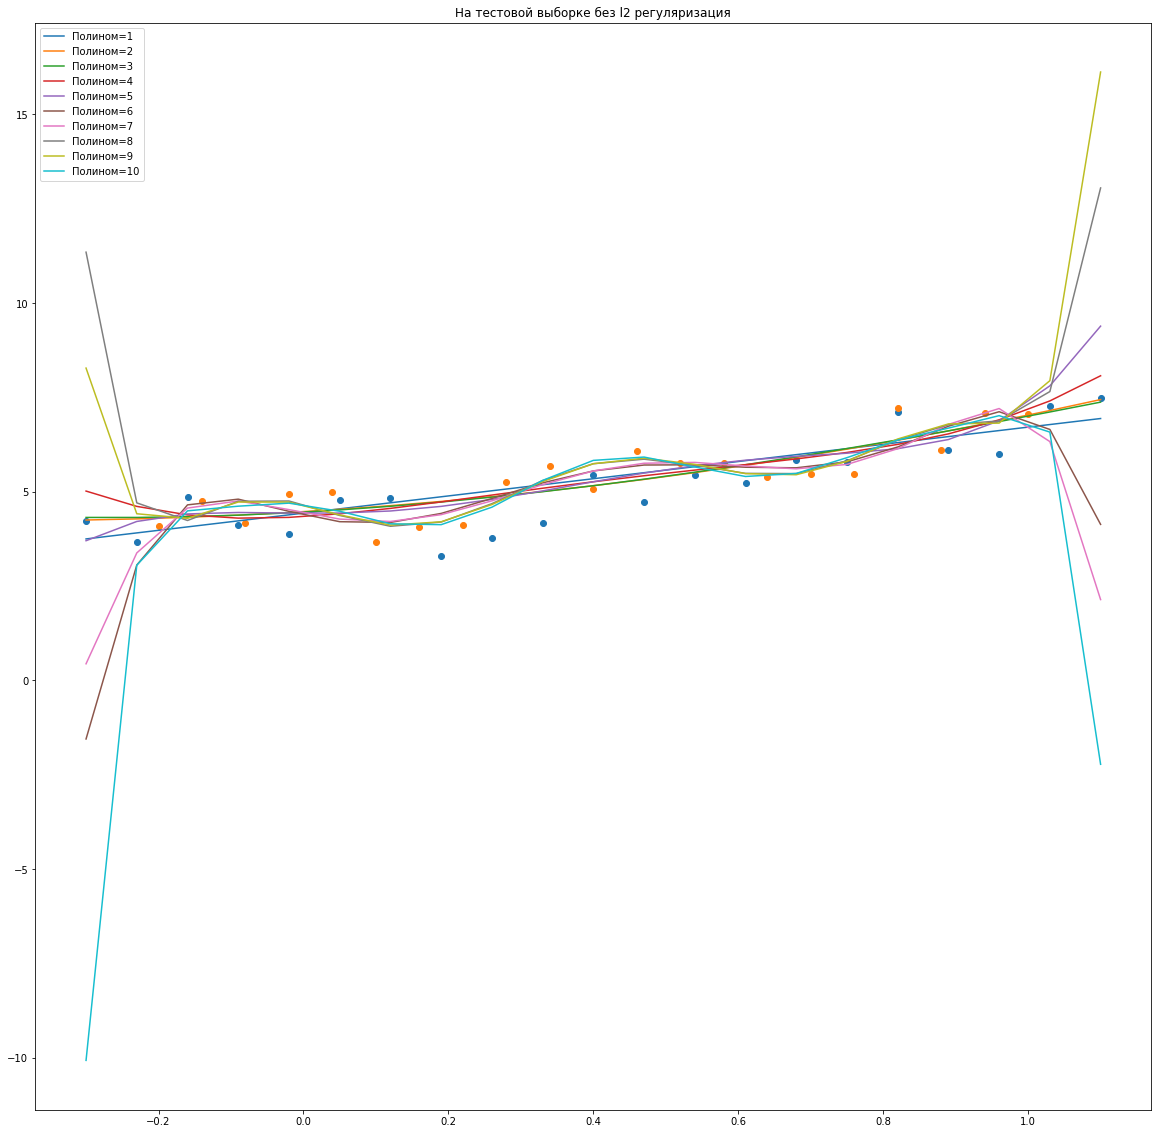

In [22]:
plt.figure(figsize=(20, 20))
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
for k in range(0, len(y_predict)):
    plt.plot(X_test, y_predict[k], label='Полином={}'.format(k+1))
plt.legend()
plt.title("На тестовой выборке без l2 регуляризация")
plt.show()

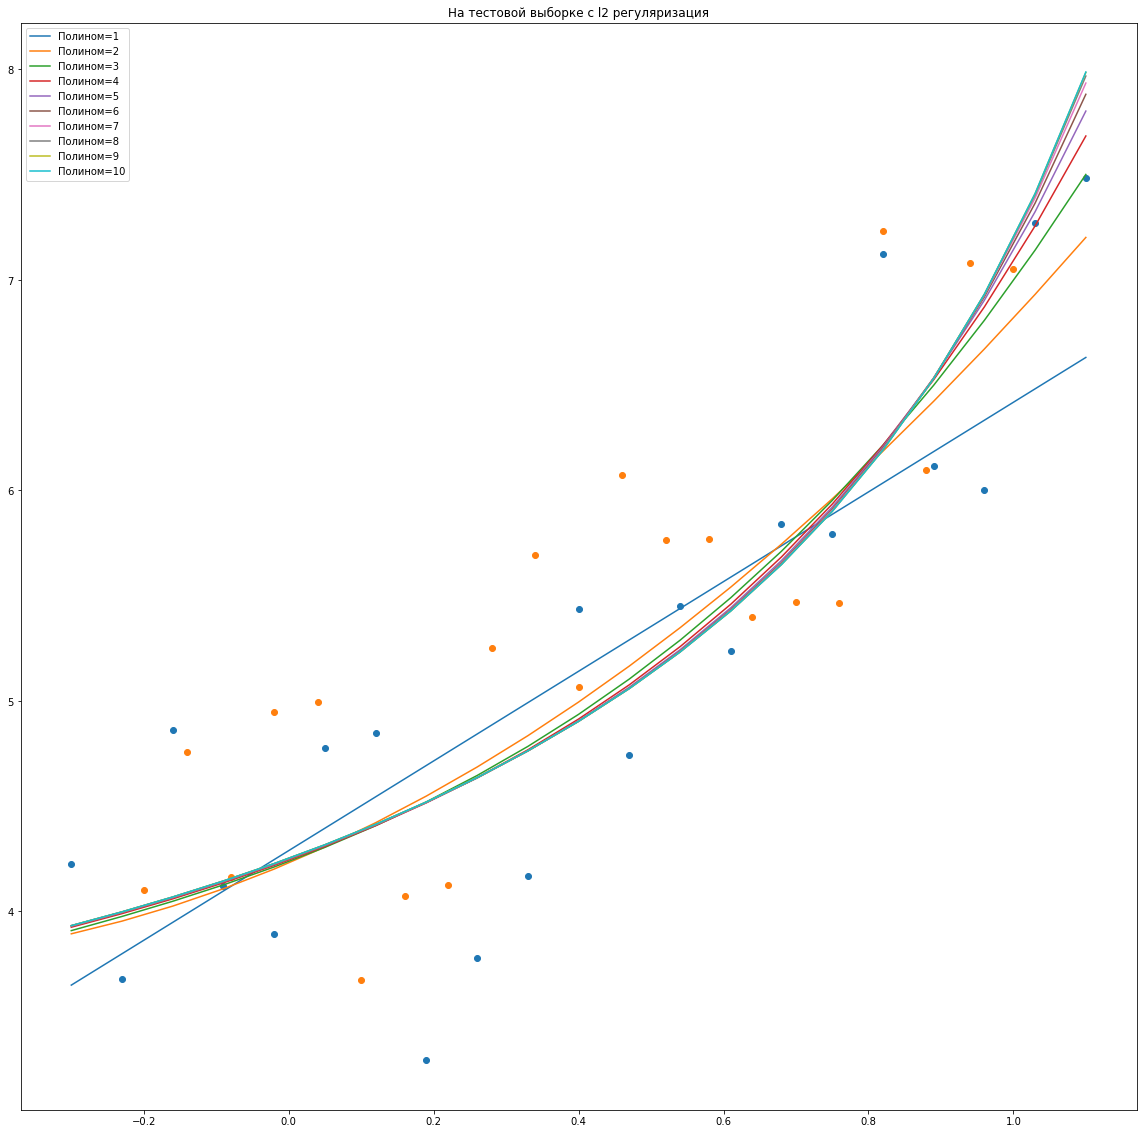

In [23]:
plt.figure(figsize=(20, 20))
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
for k in range(0, len(y_predict)):
    plt.plot(X_test, y_predict_l2[k], label='Полином={}'.format(k+1))
plt.legend()
plt.title("На тестовой выборке с l2 регуляризация")
plt.show()

In [24]:
y_mse = [ mean_squared_error(y_test, predict) for predict in y_predict ]
y_mse

[0.4351202004048878,
 0.3564762887831248,
 0.35534645715185614,
 0.4417270189277807,
 0.5579732021616849,
 2.581692932648486,
 2.515782911343015,
 4.357288930356633,
 4.776349487595008,
 14.632281896313307]

In [25]:
y_mse_l2 = [ mean_squared_error(y_test, predict) for predict in y_predict_l2 ]
y_mse_l2

[0.4042870091948628,
 0.3027033800584493,
 0.29332482944712795,
 0.2974359267709379,
 0.30331263904372985,
 0.3082199235712284,
 0.311763645176025,
 0.3140132325023878,
 0.3151285104618043,
 0.31527193553142085]

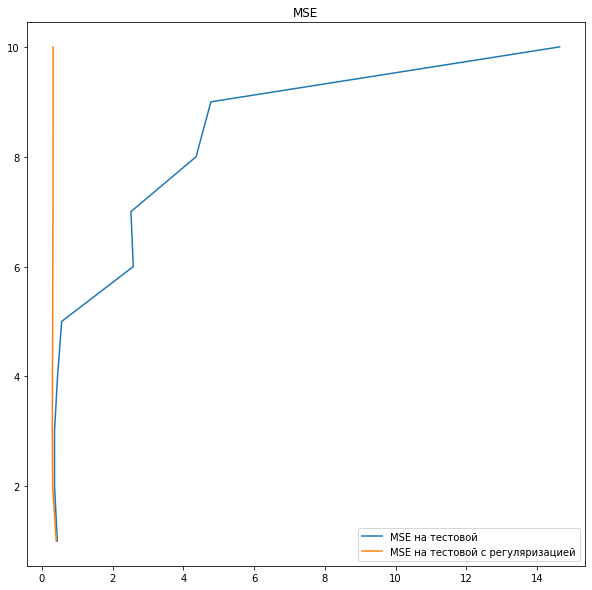

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(y_mse, range(1, 11), label='MSE на тестовой')
plt.plot(y_mse_l2, range(1, 11), label='MSE на тестовой с регуляризацией')
plt.legend()
plt.title("MSE")
plt.show()

### Задание 3. Линейная регрессия в scikit-learn

Скачайте файлы ``flats_moscow.txt`` и ``flats_moscow_description.pdf``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью линейной регрессии зависимость между ценой квартиры и остальными доступными параметрами.

Построив несколько моделей, нужно сравнить их качество. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с полиномами: как хорошо падала ошибка на обучающей выборке с ростом степени и как быстро росла ошибка на тестовых данных!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели набора данных упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

Постройте следующие модели линейной регрессии по методу наименьших квадратов:

1) на основе собственной функции (нормальное уравнение);

2) с L2-регуляризацией на основе собственной функции $-$ параметр регуляризации нужно подобрать;

3) на основе функции `LinearRegression` из `scikit-learn`;

4) с L2-регуляризацией на основе функции `Ridge` из `scikit-learn` $-$ параметр регуляризации нужно подобрать;

5) с L1-регуляризацией на основе функции `Lasso` из `scikit-learn` $-$ параметр регуляризации нужно подобрать.

Выведите и сравните регрессионные коэффициенты для всех функций. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество решения задачи, выведя среднеквадратическую ошибку на обучающих и тестовых данных для всех функций.

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('ml_lab3_flats_moscow.txt', '\t')

In [29]:
data.head(5)

,price,totsp,livesp,kitsp,dist,metrdist
0,81,58,40,6.0,12.5,7
1,75,44,28,6.0,13.5,7
2,128,70,42,6.0,14.5,3
3,95,61,37,6.0,13.5,7
4,330,104,60,11.0,10.5,7


In [30]:
y = data.price
y.shape

(2040,)

In [31]:
X = data.drop('price', axis=1)
X.shape

(2040, 5)

In [32]:
X = X['totsp'].append([X['livesp'], X['kitsp'], X['dist'], X['metrdist']]).reset_index(drop=True)

In [33]:
y = y.append(y).append(y).append(y).append(y).reset_index(drop=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
def poly_fit(x, y, l2, polynom):
    matrix = np.zeros(shape = (len(x), polynom + 1))
    matrix[:, 0] = 1
    for i in range(1, polynom + 1):
        matrix[:, i] = np.power(x, i).reshape((len(x), ))
    
    print(f"Определитель матрицы без параметра регуляризации {np.linalg.det(matrix.T.dot(matrix))}")
    print(f"Определитель матрицы с параметром регуляризации {np.linalg.det(matrix.T.dot(matrix) + l2 * np.eye(polynom + 1))}")
    W = sla.inv((matrix.T.dot(matrix) + l2 * np.eye(polynom + 1))).dot(matrix.T).dot(y)
    return np.flip(W)



In [37]:
reg = np.polyfit(X_train, y_train, 1)

In [38]:
y_pred = np.polyval(reg, X_test)

In [39]:
mean_squared_error(y_test, y_pred)

2376.13840770356

In [40]:
normReg = poly_fit(X_train.to_numpy(), y_train.to_numpy(), 1, 1)

Определитель матрицы без параметра регуляризации 49606988126.999985
Определитель матрицы с параметром регуляризации 49620118349.59996


In [41]:
normReg

array([  0.22970594, 121.33859622])

In [42]:
y_predict_norm = np.polyval(normReg, X_test)

In [43]:
y_mse = mean_squared_error(y_test, y_predict_norm)
y_mse

2376.004560321057

### Sklearn

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [48]:
y = data.price
y.shape

(2040,)

In [49]:
X = data.drop('price', axis=1)
X.shape

(2040, 5)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([ 1.42680426,  1.78023706,  1.94480447, -3.3196543 , -1.25345731])

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred.shape

(408,)

In [57]:
mean_squared_error(y_test, y_pred)

622.2120114248956

### Lasso

In [58]:
model = linear_model.Lasso(alpha=0.1)

In [59]:
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [60]:
model.coef_

array([ 1.43501788,  1.77308367,  1.91040719, -3.31249694, -1.24765771])

In [61]:
model.score(X_train, y_train)

0.6464245659843307

In [62]:
y_pred_lasso = model.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred_lasso)

622.0945705914488

### Ridge

In [64]:
model = linear_model.Ridge(alpha=100)

In [65]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [66]:
model.coef_

array([ 1.4358321 ,  1.77341883,  1.90504318, -3.30301711, -1.25003527])

In [67]:
y_pred_ridge = model.predict(X_test)

In [68]:
mean_squared_error(y_test, y_pred_ridge)

622.0647048724828



Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly = PolynomialFeatures(2)

In [71]:
x_train_poly = poly.fit_transform(X_train)

In [72]:
x_test_poly = poly.fit_transform(X_test)

In [73]:
model = LinearRegression()

In [74]:
model.fit(x_train_poly, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(x_test_poly)

In [76]:
mean_squared_error(y_test, y_pred)

595.3384461362258

In [77]:
model.score(x_test_poly, y_test)

0.7191362247496856

### Градиентный спуск (дополнительный материал)

Выпишем ещё раз явную формулу параметров линейной модели:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ — очень трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3 + d^2l)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры ищут итерационными методами, стоимость которых меньше. Один из них — градиентный спуск.

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента функции ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = -2X^T\overrightarrow{y} + 2X^TX\overrightarrow{w} = 2X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$. Стохастический градиентный спуск отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ — количество объектов, по которым оценивается градиент, $k << l$. Это отчасти объясняет популярность стохастических методов оптимизации.

In [ ]:
%pylab inline
np.random.seed(16)

Создадим данные для эксперимента следующим образом: сгенерируем вектор параметров $\overrightarrow{w}_{true}$ и матрицу объекты признаки $X$. Вектор из целевых переменных $Y$ будет вычисляться как зашумлённая версия $X\overrightarrow{w}_{true}$:

In [ ]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

Обучим линейную регрессию (в случае среднеквадратичной ошибки) для этих данных при помощи GD — тем самым получим значения параметров.

In [ ]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

Покажем последовательность оценок параметров $\overrightarrow{w}$, получаемых в ходе итераций. Красная точка — $\overrightarrow{w}_{true}$.

In [ ]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

В курсе анализа получен результат о том, что градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.

In [ ]:
# compute level set
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 27))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
        
# visualize the level set
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
        
# visualize the gradients
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2*1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .7))
plt.gca().set_aspect('equal')
plt.show()